In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #impulasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #Visualisasi data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [5]:
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [8]:
#function to count outliers using IQR
def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum()

#count outliers in each numerical column
outlier_counts ={}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = count_outliers_iqr(df[col])

#convert the results into a DataFrame for easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                  columns=['Column', 'Outlier Count'])

#display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='count', ylabel='Outcome'>

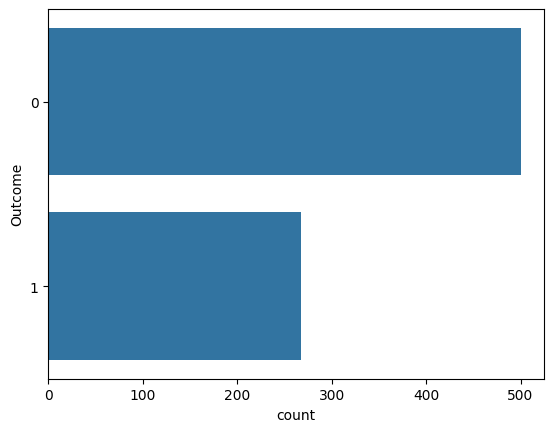

In [11]:
sns.countplot(data=df, y = 'Outcome')

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes Dataset Features')

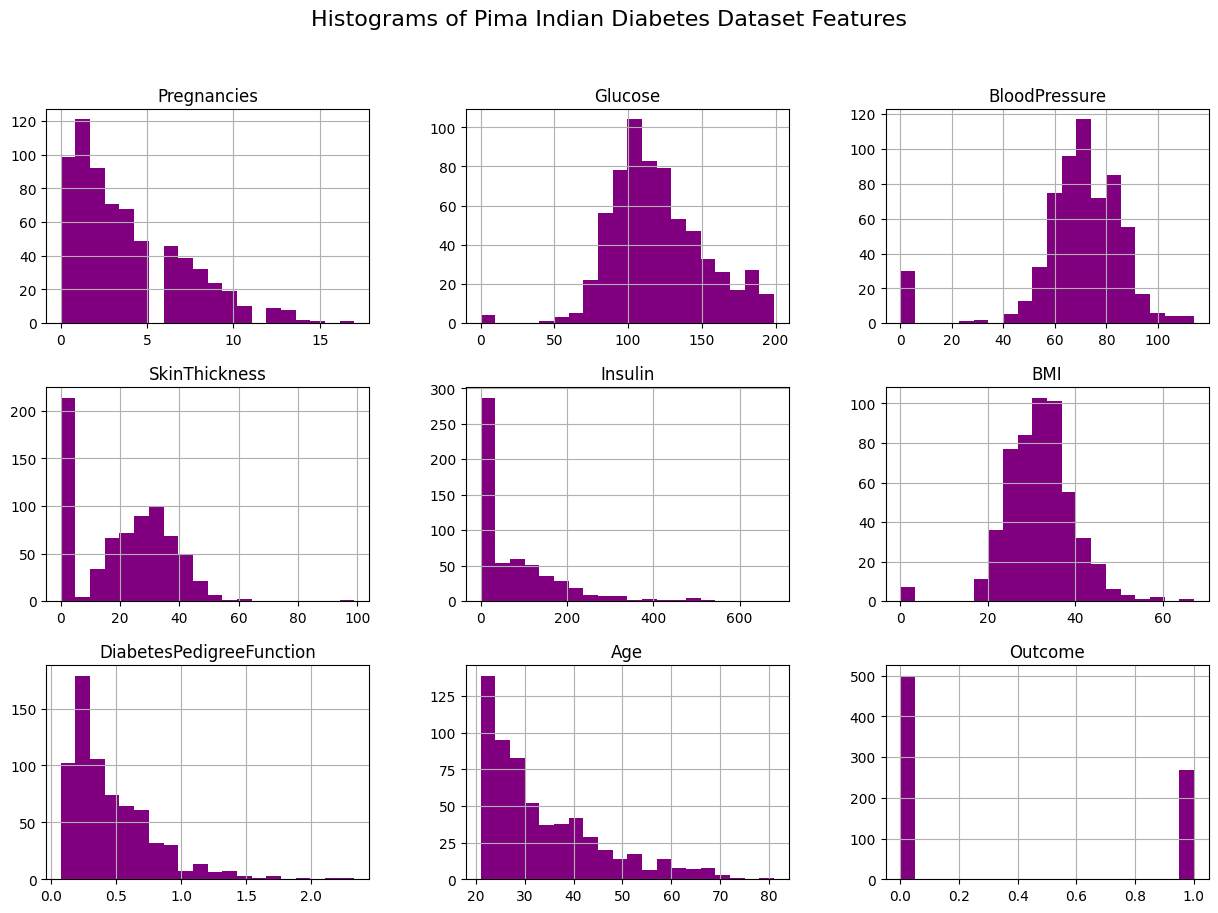

In [15]:
df.hist(bins=20, figsize=(15,10), layout=(3,3),
        color='purple');
plt.suptitle('Histograms of Pima Indian Diabetes Dataset Features',
             fontsize=16)

In [18]:
def plot_boxplots(data):
  plt.figure(figsize=(15,10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Box Plot of {column} by Diabetes Outcome')
  plt.tight_layout()
  plt.show

  plot_boxplots(df)

<Axes: >

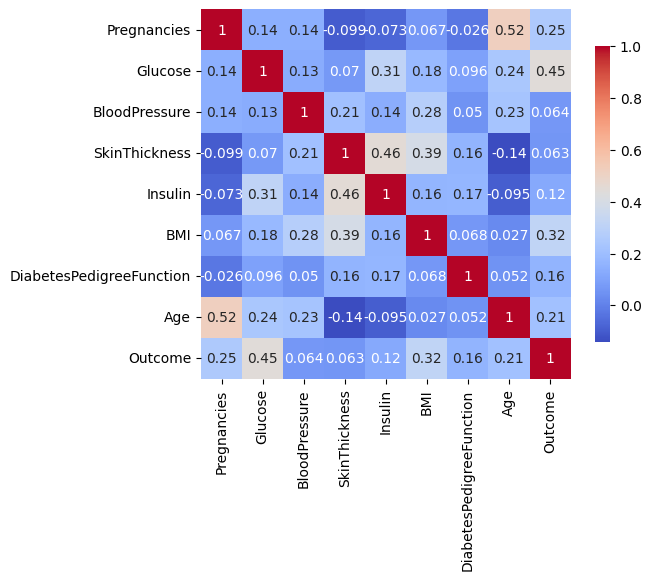

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',
            square=True, cbar_kws = {"shrink": .8})


In [21]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


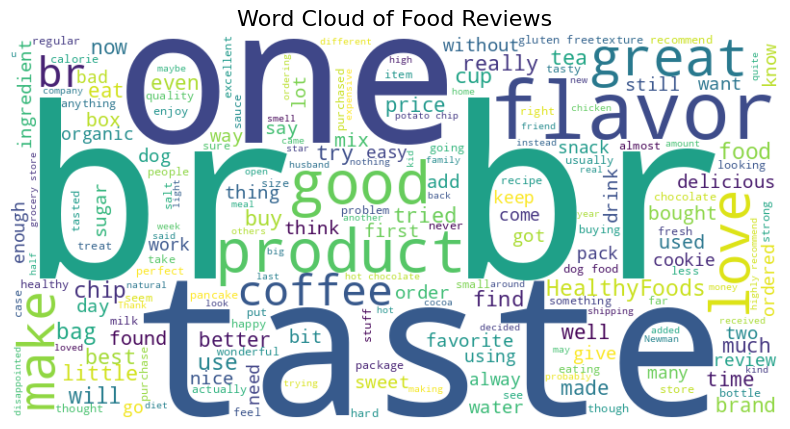

In [31]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400,
                        background_color='white',
                        colormap='viridis').generate(text)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Food Reviews', fontsize=16)
  plt.show()

plot_wordcloud(text)

In [32]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [33]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [37]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='count', ylabel='Outcome'>

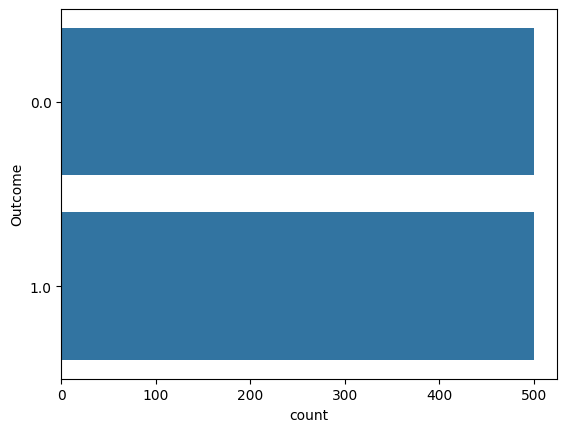

In [39]:
sns.countplot(data=df, y=y_resampled)

In [40]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,165.2,72.0,35.0,0.0,33.54,0.627,36.0,1.0
1,1.0,85.0,66.0,29.0,0.0,34.54,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1.0


In [41]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [42]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631558,1.341591,0.161680,0.909160,-0.76215,0.145372,0.509348,0.239937
1,-0.960924,-1.343540,-0.162144,0.525073,-0.76215,0.293760,-0.424792,-0.249485
2,1.268551,1.937542,-0.270085,-1.331350,-0.76215,-1.374123,0.661654,-0.151600
